In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,10)

In [2]:
str_files = ''
#Carrega os dados do arquivo .csv
df_ugrhi06 = pd.read_csv(str_files + "cetesb_concatenado06semoutliers.csv",encoding='utf-8',sep=',')

#Carrega os dados do arquivo .csv
df_ugrhi10 = pd.read_csv(str_files + "cetesb_concatenado10semoutliers.csv",encoding='utf-8',sep=',')

In [3]:
print('---- Tamanho dos conjuntos originais ----')
print('ugrhi06:',len(df_ugrhi06))
print('ugrhi10:',len(df_ugrhi10))

#Seleciona os dados equivalente ao tamanho da URGHI10
df_ugrhi06 = df_ugrhi06.iloc[0:len(df_ugrhi10)]

#Seleciona os valores da coluna ph da URGHI06, na qual será utilizado para a normalização dos dados quando apresentar o gráfico
#train_previsao = ugrhi06['ph'].values
#train_previsao = train_previsao.reshape(len(train_previsao),1)

print('---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----')
print('ugrhi06:',len(df_ugrhi06))
print('ugrhi10:',len(df_ugrhi10))

---- Tamanho dos conjuntos originais ----
ugrhi06: 503
ugrhi10: 502
---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----
ugrhi06: 502
ugrhi10: 502


In [6]:
def seleciona_colunas(trainingd,ug):
    
    if (ug == 6):        
        fph      = trainingd.iloc[:,0:1].values
        
        frame_completo = pd.DataFrame(list(zip(fph)),columns =['ph']) 
    else:
        fph      = trainingd.iloc[:,1:2].values
            
        frame_completo = pd.DataFrame(list(zip(fph)),columns =['ph'])
        
    
    return frame_completo

def seleciona_colunas_od(trainingd,ug):
    
    if (ug == 6):
        
        fod      = trainingd.iloc[:,4:5].values
        
        frame_completo = pd.DataFrame(list(zip(fod)),columns =['od']) 
    else:
        fod      = trainingd.iloc[:,5:6].values
            
        frame_completo = pd.DataFrame(list(zip(fod)),columns =['od'])
        
    
    return frame_completo  

def pegar_dados_coluna_predita_train_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train = trainingd.iloc[0:int(len(data)*percent),:].values  
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
    test = trainingd.iloc[len(train):,index_coluna:index_coluna+1].values
    
    return train,train_previsao, test

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
def normalizacao(train,test):
    sc = MinMaxScaler()
    testd = test
    train = sc.fit_transform(train)
    test = sc.fit_transform(test)    
    return train,test,testd

#Prepara o conjunto de dados em X e y, considerando a janela de visualização (lags).
#cy = coluna que será predita
def prepara_dados(dados,lags,cy):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i,:])
        y.append(dados[i, cy])
       
    return np.array(X), np.array(y)

#Calcula o MAPE
#Define função para calcular o MAPE
#def mape(y_pred,y_true):
 #   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(y_pred,y_true):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    '''  
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        
        print(real)
        mape = mape_sum/len(real)
    '''
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

def rquadrado(y_pred,y_true):
    #Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
    #É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.
    y_traco = np.mean(y_true)
    
    print('media y_true:', y_traco)
        
    stq = 0
    
    for s in y_true:
        a = s - y_traco
        st = a * a
        stq = stq + st
    
    print('Soma Total dos Quadrados (STQ):', stq[0])
    
    #Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
    #É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.
    squ = 0
    
    y_traco = np.mean(y_pred)
    print('media y_pred:', y_traco)
    
    for n in range(len(y_true)):
        a = y_true[n] - y_pred[n]
        st = a * a
        squ = squ + st
        
    print('Soma dos Quadrados dos Resíduos (SQU):',squ[0])
    print('\n')
    print('Fórmula do R²')
    print('\n')
    print('sqr = stq - squ')
    sqr = stq[0] - squ[0]
    print('R² = sqr/stq')
    sqr = sqr/stq[0]
    print('\n')
    return sqr

def correlacao_determinacao(dtframe,tipo):
    
    if (tipo == 0): #Treino
        resultado = dtframe.corr().previsao_treino.values[1]**2
    else: #teste
        resultado = dtframe.corr().previsao_teste.values[1]**2
    
    return resultado

def ajusta_array(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

def ajusta_lista(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

In [7]:
ugrhi06 = seleciona_colunas(df_ugrhi06,6)
ugrhi10 = seleciona_colunas(df_ugrhi10,10)
df_resultados_treino = pd.DataFrame()
df_resultados_teste = pd.DataFrame()
df_resultados = pd.DataFrame()

#lags = (3,5,7) 
#for l in range(1, 9, 2):
for l in range(1, 21):
    
    lags = l
    
    #seleciona os dados
    
    train06,train_previsao06, test06 = pegar_dados_coluna_predita_train_test(ugrhi06,0.70,0) 
    train10,train_previsao10, test10 = pegar_dados_coluna_predita_train_test(ugrhi10,0.70,0) 
    
    #normalização dos dados
    train06,test06,testd06 = normalizacao(train06,test06)
    train10,test10,testd10 = normalizacao(train10,test10)
    
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao06)
    
    #Prepara os dados de treinamento -ugrhi06
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X06, train_y06 = prepara_dados(train06, lags,0)
        
    #Prepara os dados de teste
    entradas06 = ugrhi06[len(ugrhi06) - len(test06) - lags:].values
    entradas06 = sc.fit_transform(entradas06)   
    
    test_X06 = []
    for i in range(lags, lags+len(test06)):
        test_X06.append(entradas06[i-lags:i, 0:1])
    test_X06 = np.array(test_X06)
    
    #Ajusta a dimensão de test_X06 e train_X06
    nsamples, nx, ny = test_X06.shape
    test_X06 = test_X06.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X06.shape
    train_X06 = train_X06.reshape((nsamples,nx*ny))
    
    #Prepara os dados de treinamento -ugrhi10
    #Aqui vamos pegar test_X10.
    train_X10, train_y10 = prepara_dados(train10, lags,0)
        
    #Prepara os dados de teste
    entradas10 = ugrhi10[len(ugrhi10) - len(test10) - lags:].values
    entradas10 = sc.fit_transform(entradas10)   
    
    test_X10 = []
    for i in range(lags, lags+len(test10)):
        test_X10.append(entradas10[i-lags:i, 0:1])
    test_X10 = np.array(test_X10)
    
    #Ajusta a dimensão de test_X10 
    nsamples, nx, ny = test_X10.shape
    test_X10 = test_X10.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X10.shape
    train_X10 = train_X10.reshape((nsamples,nx*ny))
        
    #Cria o modelo
    model = LinearRegression(normalize=True)
    
    #Treina o modelo
    model.fit(train_X06,train_y06)
    score = model.score(train_X06,train_y06)
    #print(score)

    #Dados de teste
    previsoes = model.predict(test_X10)
    previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
       
    print('Teste - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(testd10,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
    
    
    #Dados de treino
    previsoes_treino = model.predict(train_X10)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
    
    print('Treinamento - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(train_previsao10,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
            
    treino = train_previsao10[lags: len(previsoes_treino) + lags, :]
    observado_test = testd10
    
    observado_treino = train_previsao10
    
    treino         = ajusta_array(treino)
    observado_test = ajusta_array(observado_test)
               
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    observado_treino_d = observado_treino
    previsoes_treino_d = previsoes_treino
    previsoes_d        = previsoes
        
    mape_treino_d        = round(mape(previsoes_treino,treino),4)
    rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
    #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
    mape_teste_d        = round(mape(previsoes,observado_test),4)
    rmse_teste_d        = round(rmse(previsoes,observado_test),4)
    #r_teste_d           = round(r2(previsoes,observado_test),4) 
    
    #print('treino:',treino)
       
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
    
    #print('previsao_treino:', previsoes_treino)
    
    #Calcula o coeficiente de determinação
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_array(treino)} 
    
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_array(observado_test)} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino_d = []
    r_teste_d  = []
    
    r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
    r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
    
    lag_treino = []
    lag_teste = []
    
    lag_treino.append(lags)
    lag_teste.append(lags)
        
    # dictionary of lists  
    
    dict = {'lags_treino': lag_treino, 'mape_treino': mape_treino_d, 'rmse_treino': rmse_treino_d,'r_quad_treino':r_treino_d,
            'lags_teste': lag_teste, 'mape_teste': mape_teste_d, 'rmse_teste': rmse_teste_d,'r_quad_teste':r_teste_d} 
    
    df_result = pd.DataFrame(dict)
    dframes = [df_resultados,df_result]
    df_resultados = pd.concat(dframes)  

Teste - Gráficos com lag 1
Treinamento - Gráficos com lag 1
Teste - Gráficos com lag 2
Treinamento - Gráficos com lag 2
Teste - Gráficos com lag 3
Treinamento - Gráficos com lag 3
Teste - Gráficos com lag 4
Treinamento - Gráficos com lag 4
Teste - Gráficos com lag 5
Treinamento - Gráficos com lag 5
Teste - Gráficos com lag 6
Treinamento - Gráficos com lag 6
Teste - Gráficos com lag 7
Treinamento - Gráficos com lag 7
Teste - Gráficos com lag 8
Treinamento - Gráficos com lag 8
Teste - Gráficos com lag 9
Treinamento - Gráficos com lag 9
Teste - Gráficos com lag 10
Treinamento - Gráficos com lag 10
Teste - Gráficos com lag 11
Treinamento - Gráficos com lag 11
Teste - Gráficos com lag 12
Treinamento - Gráficos com lag 12
Teste - Gráficos com lag 13
Treinamento - Gráficos com lag 13
Teste - Gráficos com lag 14
Treinamento - Gráficos com lag 14
Teste - Gráficos com lag 15
Treinamento - Gráficos com lag 15
Teste - Gráficos com lag 16
Treinamento - Gráficos com lag 16
Teste - Gráficos com lag 1

In [8]:
df_resultados.describe()

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,7.080785,0.527515,0.117780,10.50000,6.105190,0.459925,0.001720
std,5.91608,0.068161,0.002549,0.010343,5.91608,0.043784,0.007486,0.001052
min,1.00000,6.871100,0.521300,0.101300,1.00000,6.032400,0.450700,0.000200
25%,5.75000,7.070925,0.526025,0.107550,5.75000,6.063075,0.453500,0.001100
50%,10.50000,7.107350,0.528100,0.121900,10.50000,6.111450,0.458200,0.001700
75%,15.25000,7.120850,0.529525,0.125000,15.25000,6.145600,0.465725,0.002150
max,20.00000,7.152100,0.531300,0.134900,20.00000,6.155700,0.478800,0.004700


In [12]:
ugrhi06 = seleciona_colunas_od(df_ugrhi06,6)
ugrhi10 = seleciona_colunas_od(df_ugrhi10,10)
df_resultados_treino = pd.DataFrame()
df_resultados_teste = pd.DataFrame()
df_resultados = pd.DataFrame()

print(ugrhi06)
print(ugrhi10)

#lags = (3,5,7) 
#for l in range(1, 9, 2):
for l in range(1, 21):
    
    lags = l
    
    #seleciona os dados
    
    train06,train_previsao06, test06 = pegar_dados_coluna_predita_train_test(ugrhi06,0.70,0) 
    train10,train_previsao10, test10 = pegar_dados_coluna_predita_train_test(ugrhi10,0.70,0) 
    
    #normalização dos dados
    train06,test06,testd06 = normalizacao(train06,test06)
    train10,test10,testd10 = normalizacao(train10,test10)
    
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao06)
    
    #Prepara os dados de treinamento -ugrhi06
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X06, train_y06 = prepara_dados(train06, lags,0)
        
    #Prepara os dados de teste
    entradas06 = ugrhi06[len(ugrhi06) - len(test06) - lags:].values
    entradas06 = sc.fit_transform(entradas06)   
    
    test_X06 = []
    for i in range(lags, lags+len(test06)):
        test_X06.append(entradas06[i-lags:i, 0:1])
    test_X06 = np.array(test_X06)
    
    #Ajusta a dimensão de test_X06 e train_X06
    nsamples, nx, ny = test_X06.shape
    test_X06 = test_X06.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X06.shape
    train_X06 = train_X06.reshape((nsamples,nx*ny))
    
    #Prepara os dados de treinamento -ugrhi10
    #Aqui vamos pegar test_X10.
    train_X10, train_y10 = prepara_dados(train10, lags,0)
        
    #Prepara os dados de teste
    entradas10 = ugrhi10[len(ugrhi10) - len(test10) - lags:].values
    entradas10 = sc.fit_transform(entradas10)   
    
    test_X10 = []
    for i in range(lags, lags+len(test10)):
        test_X10.append(entradas10[i-lags:i, 0:1])
    test_X10 = np.array(test_X10)
    
    #Ajusta a dimensão de test_X10 
    nsamples, nx, ny = test_X10.shape
    test_X10 = test_X10.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X10.shape
    train_X10 = train_X10.reshape((nsamples,nx*ny))
        
    #Cria o modelo
    model = LinearRegression(normalize=True)
    
    #Treina o modelo
    model.fit(train_X06,train_y06)
    score = model.score(train_X06,train_y06)
    #print(score)

    #Dados de teste
    previsoes = model.predict(test_X10)
    previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
       
    print('Teste - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(testd10,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''    
    
    #Dados de treino
    previsoes_treino = model.predict(train_X10)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
    
    print('Treinamento - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(train_previsao10,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
                
    treino = train_previsao10[lags: len(previsoes_treino) + lags, :]
    observado_test = testd10
    
    observado_treino = train_previsao10
    
    treino         = ajusta_array(treino)
    observado_test = ajusta_array(observado_test)
               
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    observado_treino_d = observado_treino
    previsoes_treino_d = previsoes_treino
    previsoes_d        = previsoes
        
    mape_treino_d        = round(mape(previsoes_treino,treino),4)
    rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
    #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
    mape_teste_d        = round(mape(previsoes,observado_test),4)
    rmse_teste_d        = round(rmse(previsoes,observado_test),4)
    #r_teste_d           = round(r2(previsoes,observado_test),4) 
    
    #print('treino:',treino)
       
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
    
    #print('previsao_treino:', previsoes_treino)
    
    #Calcula o coeficiente de determinação
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_array(treino)} 
    
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_array(observado_test)} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino_d = []
    r_teste_d  = []
    
    r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
    r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
    
    lag_treino = []
    lag_teste = []
    
    lag_treino.append(lags)
    lag_teste.append(lags)
        
    # dictionary of lists  
    
    dict = {'lags_treino': lag_treino, 'mape_treino': mape_treino_d, 'rmse_treino': rmse_treino_d,'r_quad_treino':r_treino_d,
            'lags_teste': lag_teste, 'mape_teste': mape_teste_d, 'rmse_teste': rmse_teste_d,'r_quad_teste':r_teste_d} 
    
    df_result = pd.DataFrame(dict)
    dframes = [df_resultados,df_result]
    df_resultados = pd.concat(dframes)  

                       od
0    [1.2889830508474576]
1    [1.3555085519696617]
2    [1.4291617853549592]
3    [1.5004391079858923]
4    [1.5740923413711898]
..                    ...
497  [0.5470491803278689]
498                [0.42]
499                [0.72]
500             [2.25625]
501             [2.25625]

[502 rows x 1 columns]
                       od
0    [2.4716666666666667]
1    [2.4426757990867585]
2     [2.410578767123288]
3    [2.3795171232876715]
4     [2.347420091324201]
..                    ...
497   [3.799183673469388]
498  [3.8497959183673465]
499   [3.900408163265306]
500  [3.9493877551020407]
501                 [4.0]

[502 rows x 1 columns]
Teste - Gráficos com lag 1
Treinamento - Gráficos com lag 1
Teste - Gráficos com lag 2
Treinamento - Gráficos com lag 2
Teste - Gráficos com lag 3
Treinamento - Gráficos com lag 3
Teste - Gráficos com lag 4
Treinamento - Gráficos com lag 4
Teste - Gráficos com lag 5
Treinamento - Gráficos com lag 5
Teste - Gráficos com lag 6
T

In [13]:
df_resultados.describe()

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,47.958755,2.392165,0.052005,10.50000,44.705845,2.108505,0.004820
std,5.91608,0.283587,0.020742,0.034549,5.91608,0.328409,0.020411,0.005376
min,1.00000,47.400200,2.352600,0.015700,1.00000,44.195200,2.085200,0.000000
25%,5.75000,47.739775,2.382675,0.018900,5.75000,44.416525,2.088800,0.000100
50%,10.50000,47.969900,2.391700,0.048200,10.50000,44.771800,2.105300,0.001500
75%,15.25000,48.195500,2.411175,0.079175,15.25000,44.914200,2.128875,0.010075
max,20.00000,48.335900,2.417600,0.117400,20.00000,45.266000,2.140200,0.013900


In [33]:
ugrhi10

,valor
data_coleta,
1978-01-31,7.100
1978-03-31,6.625
1978-05-31,6.650
1978-07-31,6.625
1978-09-30,6.575
...,...
2018-07-31,7.266
2018-09-30,7.250
2018-11-30,7.244


In [34]:
#Seleciona os dados da UGRHI 10 - SOROCABA/MEDIO TIETE
z = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']

In [35]:
#Agrupa os dados pela media bimestral
trainingd = z.resample('2M').mean()

In [36]:
trainingd
#Remove as colunas que não serão utilizadas no experimento.
trainingd = trainingd.drop(['cod_interaguas', 'sinal','Altitude'], axis=1)
trainingd

,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [37]:
for field in trainingd.columns:
    print(field, 'NaN:', trainingd[field].isnull().sum())

valor NaN: 2


In [38]:
trainingd = trainingd.dropna(axis=0,how='any')


In [39]:
for field in trainingd.columns:
    print(field, 'NaN:', trainingd[field].isnull().sum())
trainingd

valor NaN: 0


,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [40]:
#Regra 1.5*FIG --> Calcula-se o limite inferior e superior do diagrama de caixa.

#Ordena o dataframe
trainingds = trainingd.sort_values('valor',axis=0)

trainingds

tamanho = len(trainingds)
#Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
#Calcula o 3Q, ou seja, 75% do diagrama de caixa.
terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

print('primeiro_quartil:',primeiro_quartil)
print('terceiro_quartil:',terceiro_quartil)

#Calcula-se o interquartil(FIQ).
fig = terceiro_quartil - primeiro_quartil
print('fig:',fig)

#Calcula o limite inferior.
inferior = primeiro_quartil - (1.5*fig)
#Calcula o limite superior.
superior = terceiro_quartil + (1.5*fig)

print('Inferior:',inferior)
print('Superior:',superior)

#Seleciona os valores abaixo  do limite inferior, ou seja, os outlier.
outlier = trainingd[(trainingds.valor < inferior.valor)]

outlier

primeiro_quartil: valor    6.583333
Name: 0.25, dtype: float64
terceiro_quartil: valor    7.002667
Name: 0.75, dtype: float64
fig: valor    0.419333
dtype: float64
Inferior: valor    5.954333
dtype: float64
Superior: valor    7.631667
dtype: float64


C:\Users\Anderson\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,valor
data_coleta,
1979-11-30,5.916667
1985-03-31,5.883333


In [41]:
trainingd

,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [42]:
#Remove a última linha do dataframe
trainingd = trainingd.drop(trainingd[trainingd.index == '2019-09-30'].index)

In [43]:
trainingd.describe()

,valor
count,248.000000
mean,6.793328
std,0.294764
min,5.883333
25%,6.581944
50%,6.838095
75%,7.001821
max,7.405000


In [44]:
#Substituição do outlier pelo valor médio da serie dos dados.
trainingd.loc[trainingds.valor < inferior.valor] = 6.79

ugrhi06 = trainingd

outlier = trainingd[(trainingd.valor < inferior.valor)]

outlier

,valor
data_coleta,


In [58]:
#Dados completo.
dataugrhi10 = ugrhi10.iloc[:,:].values
dataugrhi06 = ugrhi06.iloc[:,:].values

#treino (70%)
train10 = ugrhi10.iloc[0:int(len(dataugrhi10)*0.70),:].values  
train06 = ugrhi06.iloc[0:int(len(dataugrhi06)*0.70),:].values

#teste (30%)
test10 = ugrhi10.iloc[len(train10):,:].values 
test06 = ugrhi06.iloc[len(train06):,:].values

teste_observado = test06

In [59]:
#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
sc = MinMaxScaler()
train10 = sc.fit_transform(train10)
#train06 = sc.fit_transform(train06)
test10 = sc.fit_transform(test10)
test06 = sc.fit_transform(test06)

In [60]:
def mape(y_pred,y_true):
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        mape = mape_sum/len(real)
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

In [61]:
def prepara_dados(dados,lags):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i, 0])
        y.append(dados[i, 0])
    return np.array(X), np.array(y)

Gráficos com lag 3


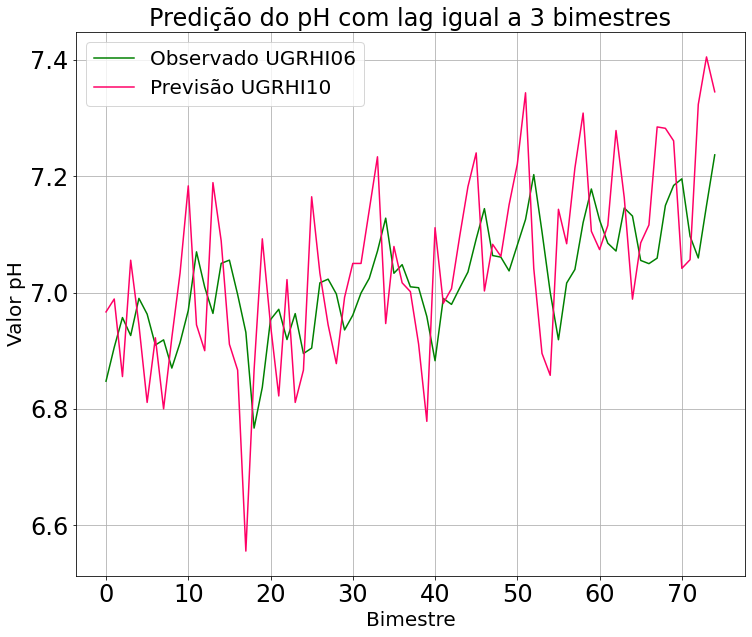

Gráficos com lag 5


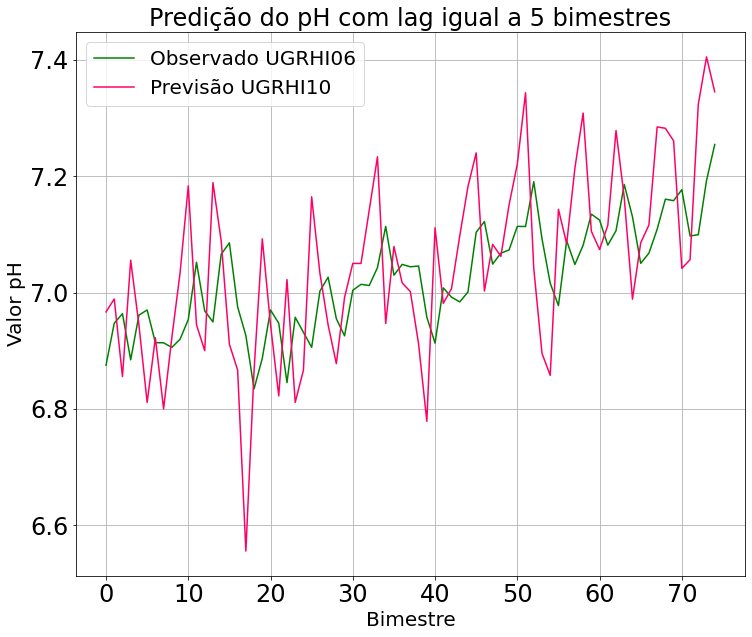

Gráficos com lag 7


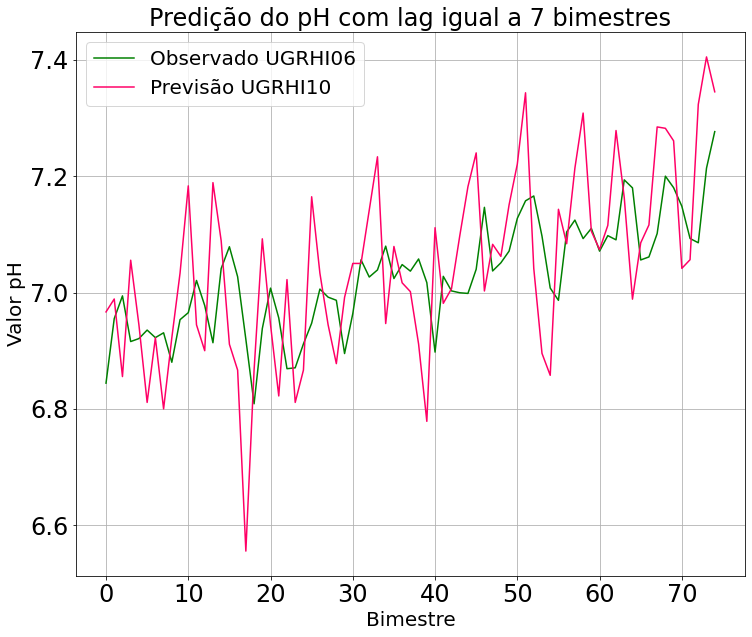

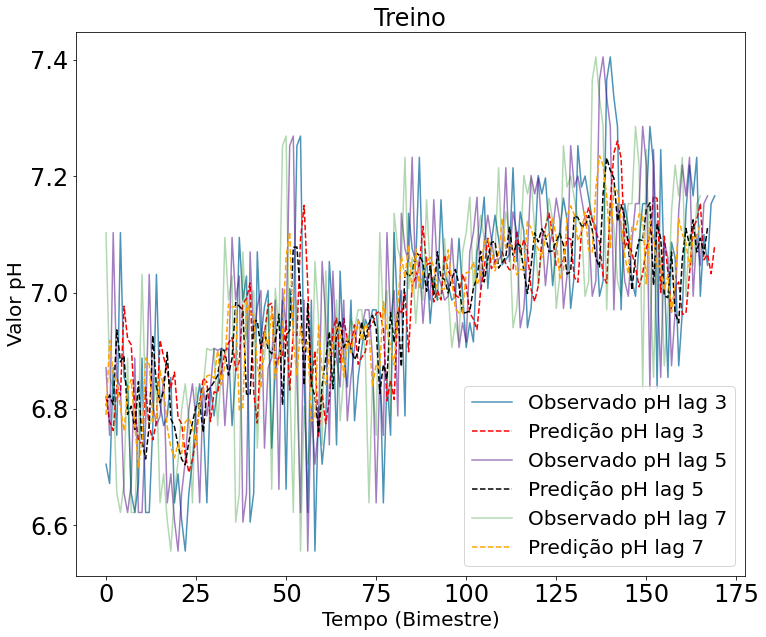

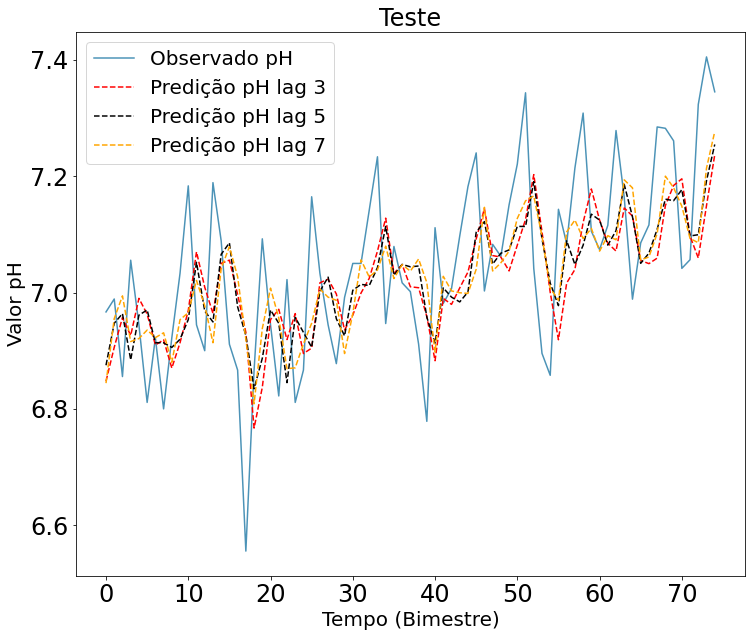

In [67]:
for l in range(3, 9, 2):
    
    lags = l
    #Prepara os dados de treinamento
    X_train10, y_train10 = prepara_dados(train10, lags)
    
    #Prepara os dados de teste
    entradas10 = ugrhi10[len(ugrhi10) - len(test10) - lags:].values
    entradas10 = entradas10.reshape(-1, 1)
    entradas10 = sc.fit_transform(entradas10)

    X_test10 = []
    for i in range(lags, lags+len(test10)):
        X_test10.append(entradas10[i-lags:i, 0])
    X_test10 = np.array(X_test10)

    #Prepara os dados de teste06
    entradas06 = ugrhi06[len(ugrhi06) - len(test06) - lags:].values
    entradas06 = entradas06.reshape(-1, 1)
    entradas06 = sc.fit_transform(entradas06)

    X_test06 = []
    for i in range(lags, lags+len(test06)):
        X_test06.append(entradas06[i-lags:i, 0])
    X_test06 = np.array(X_test06)
    
    regression = LinearRegression()
    regression.fit(X_train10,y_train10)

    #Predição dos dados de teste
    y_pred10 = regression.predict(X_test06)
    y_pred10 = y_pred10.reshape(-1, 1)
    y_pred10 = sc.inverse_transform(y_pred10)
    
    #Predição dos dados de treinamento
    y_pred10t = regression.predict(X_train10)
    y_pred10t = y_pred10t.reshape(-1, 1)
    y_pred10t = sc.inverse_transform(y_pred10t)
    
    y_train10 = y_train10.reshape(-1, 1)
    treino = sc.inverse_transform(y_train10)
    
    #Plotagem do gráfico
    print('Gráficos com lag', l)
    plt.plot(y_pred10, color = 'green', label = 'Observado UGRHI06')
    plt.plot(teste_observado, color = '#ff0066', label = 'Previsão UGRHI10')
    plt.title('Predição do pH com lag igual a ' + str(l) + ' bimestres')
    plt.xlabel('Bimestre')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    
    if l == 3:
        observado_treino_a = treino
        previsoes_treino_a = y_pred10t
        previsoes_a        = y_pred10
        
        mape_treino_a        = round(mape(y_pred10t,treino)[0],4)
        rmse_treino_a        = round(rmse(y_pred10t,treino),4)
        r_treino_a           = round(r2(y_pred10t,treino),4)
        
        mape_teste_a        = round(mape(y_pred10,teste_observado)[0],4)
        rmse_teste_a        = round(rmse(y_pred10,teste_observado),4)
        r_teste_a           = round(r2(y_pred10,teste_observado),4)
        
    elif l == 5:
        observado_treino_b = treino
        previsoes_treino_b = y_pred10t
        previsoes_b        = y_pred10
        
        mape_treino_b        = round(mape(y_pred10t,treino)[0],4)
        rmse_treino_b        = round(rmse(y_pred10t,treino),4)
        r_treino_b           = round(r2(y_pred10t,treino),4)
        
        mape_teste_b        = round(mape(y_pred10,teste_observado)[0],4)
        rmse_teste_b        = round(rmse(y_pred10,teste_observado),4)
        r_teste_b           = round(r2(y_pred10,teste_observado),4)
        
    else:
        observado_treino_c = treino
        previsoes_treino_c = y_pred10t
        previsoes_c        = y_pred10
        
        mape_treino_c        = round(mape(y_pred10t,treino)[0],4)
        rmse_treino_c        = round(rmse(y_pred10t,treino),4)
        r_treino_c           = round(r2(y_pred10t,treino),4)
        
        mape_teste_c        = round(mape(y_pred10,teste_observado)[0],4)
        rmse_teste_c        = round(rmse(y_pred10,teste_observado),4)
        r_teste_c           = round(r2(y_pred10,teste_observado),4)
        
#Plotagem do gráfico
plt.plot(observado_treino_a, color = '#006699', alpha=0.7, label = 'Observado pH lag 3')
plt.plot(previsoes_treino_a, color = 'red',linestyle = '--', label = 'Predição pH lag 3')
plt.plot(observado_treino_b, color = 'indigo', alpha=0.5, label = 'Observado pH lag 5')
plt.plot(previsoes_treino_b, color = 'black',linestyle = '--', label = 'Predição pH lag 5')
plt.plot(observado_treino_c, color = 'green', alpha=0.3, label = 'Observado pH lag 7')
plt.plot(previsoes_treino_c, color = 'orange',linestyle = '--', label = 'Predição pH lag 7')
plt.title('Treino')
plt.xlabel('Tempo (Bimestre)')
plt.ylabel('Valor pH')
plt.legend()
plt.show()

#Plotagem do gráfico
#plt.plot(data, color = '#006699',alpha=0.5, label = 'Observado')
plt.plot(teste_observado, color = '#006699', alpha=0.7, label = 'Observado pH')
plt.plot(previsoes_a, color = 'red',linestyle = '--', label = 'Predição pH lag 3')
plt.plot(previsoes_b, color = 'black',linestyle = '--', label = 'Predição pH lag 5')
plt.plot(previsoes_c, color = 'orange',linestyle = '--', label = 'Predição pH lag 7')
plt.title('Teste')
plt.xlabel('Tempo (Bimestre)')
plt.ylabel('Valor pH')
plt.legend()
plt.show()


# intialise data of lists.
data_treino = {'Lags':[3, 5, 7],
        'MAPE':[mape_treino_a, mape_treino_b, mape_treino_c],
        'RMSE':[rmse_treino_a, rmse_treino_b, rmse_treino_c],
        'R²':[r_treino_a, r_treino_b, r_treino_c],
        'TIPO':['TREINO', 'TREINO', 'TREINO']}

# intialise data of lists.
data_teste = {'Lags':[3, 5, 7],
        'MAPE':[mape_teste_a, mape_teste_b, mape_teste_c],
        'RMSE':[rmse_teste_a, rmse_teste_b, rmse_teste_c],
        'R²':[r_teste_a, r_teste_b, r_teste_c],
        'TIPO':['TESTE', 'TESTE', 'TESTE']}
 
# Create DataFrame
df_resultados_treino = pd.DataFrame(data_treino)
df_resultados_teste = pd.DataFrame(data_teste)

In [68]:
df_resultados_treino

,Lags,MAPE,RMSE,R²,TIPO
0,3,2.5495,0.1388,0.4232,TREINO
1,5,2.5017,0.1362,0.4355,TREINO
2,7,2.4232,0.1332,0.4605,TREINO


In [69]:
df_resultados_teste

,Lags,MAPE,RMSE,R²,TIPO
0,3,1.2629,0.1415,0.1938,TESTE
1,5,1.1920,0.1352,0.2632,TESTE
2,7,1.1631,0.1329,0.2881,TESTE
